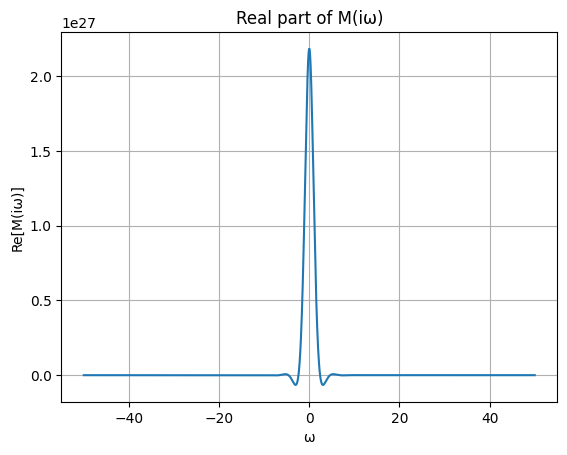

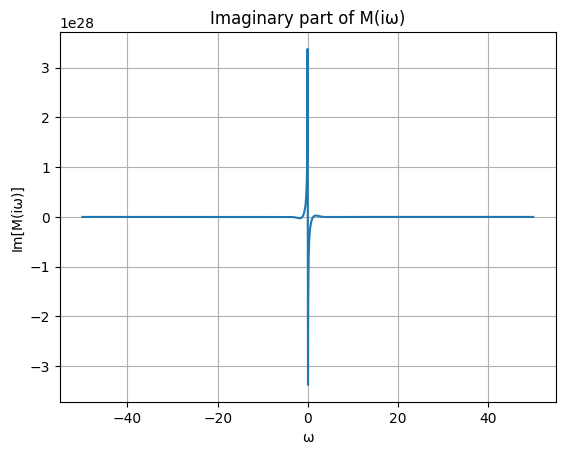

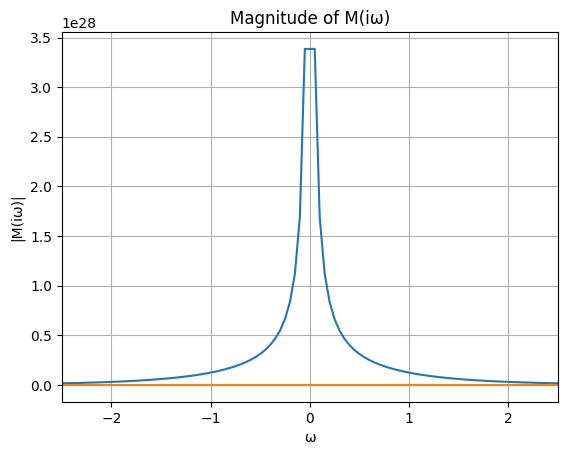

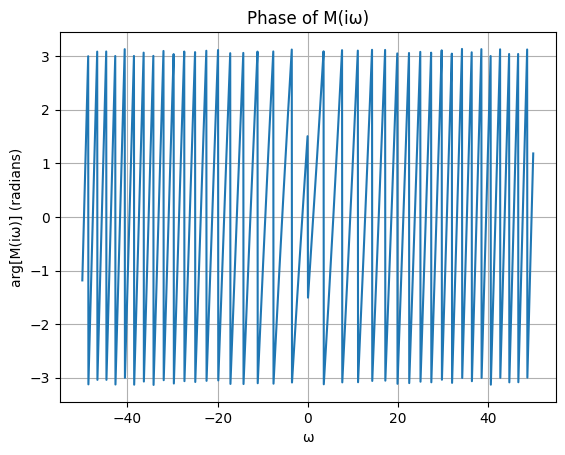

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Try to import a complex gamma function implementation
try:
    import mpmath as mp
    gamma_func = mp.gamma
    sqrt_pi = mp.sqrt(mp.pi)
except ImportError:
    # Fallback to scipy if available
    try:
        from scipy import special as sp
        gamma_func = sp.gamma
        from math import sqrt, pi
        sqrt_pi = sqrt(pi)
    except ImportError:
        raise ImportError("Neither mpmath nor scipy is available for gamma function.")

# Define the Mellin transform of jinc^2 evaluated at s = i*omega
def mellin_jinc2_iomega(omega, alpha=1, k=0):
    s = 1j * omega - k
    numerator = gamma_func(s / 2) * gamma_func((3 - s) / 2)
    denominator = 2 * sqrt_pi * gamma_func(2 - s / 2) * gamma_func(3 - s / 2)
    return (numerator / denominator)

# Generate omega values (avoid omega = 0 to skip the simple pole)
omega_neg = np.linspace(-50, -0.05, 1000)
omega_pos = np.linspace(0.05, 50, 1000)
omega = np.concatenate([omega_neg, omega_pos])

# Compute Mellin transform values
period = 200e-6
alpha = np.sqrt(2)/period
ks = np.arange(5)
M_values = np.zeros_like(omega, dtype=np.complex64)

from scipy.special import comb
for k in ks:
    M_values += comb(alpha, k) * alpha**(k) * np.array([mellin_jinc2_iomega(w, 1, k) for w in omega], dtype=np.complex128)

M_values_2 = np.array([mellin_jinc2_iomega(w, 1, 0) for w in omega], dtype=np.complex128)
# Separate real, imaginary, magnitude, and phase
M_real = M_values.real
M_imag = M_values.imag
M_mag = np.abs(M_values)
M_phase = np.angle(M_values)

M_mag_2 = np.abs(M_values_2)
# Plot Real part
plt.figure()
plt.plot(omega, M_real)
plt.title('Real part of M(iω)')
plt.xlabel('ω')
plt.ylabel('Re[M(iω)]')
plt.grid(True)
plt.show()

# Plot Imaginary part
plt.figure()
plt.plot(omega, M_imag)
plt.title('Imaginary part of M(iω)')
plt.xlabel('ω')
plt.ylabel('Im[M(iω)]')
plt.grid(True)
plt.show()

# Plot Magnitude
plt.figure()
plt.plot(omega, M_mag)
plt.plot(omega, M_mag_2)
plt.xlim(-2.5,2.5)
plt.title('Magnitude of M(iω)')
plt.xlabel('ω')
plt.ylabel('|M(iω)|')
#plt.yscale('log')  # Log scale to handle large dynamic range
plt.grid(True, which='both')
plt.show()

# Plot Phase
plt.figure()
plt.plot(omega, M_phase)
plt.title('Phase of M(iω)')
plt.xlabel('ω')
plt.ylabel('arg[M(iω)] (radians)')
plt.grid(True)
plt.show()


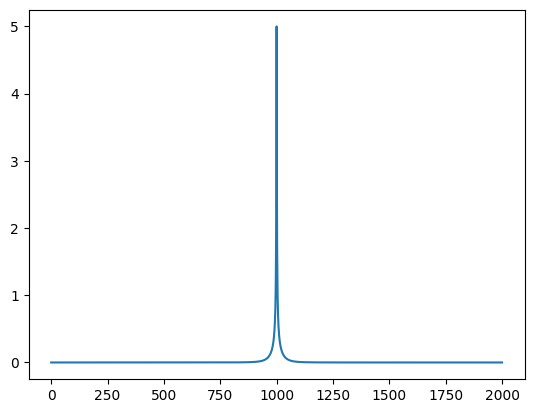

In [23]:
plt.plot(M_mag_2)